## ROLL NO: 31440
### DSBDAL Assignment No - 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [7]:
data=df.iloc[:,1:]
data


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [8]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
data['Gender']=data['Gender'].map({'Male':0,'Female':1})
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [10]:
data.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [11]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
cols=['Age', 'EstimatedSalary']
cols

['Age', 'EstimatedSalary']

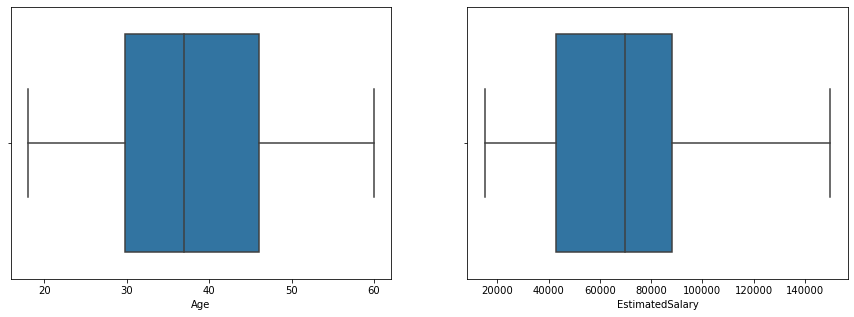

In [13]:
t=1
plt.figure(figsize=(15,5))
for i in cols:
    plt.subplot(1,2,t)
    t=t+1
    sns.boxplot(data[i])
    

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(data[['Age','EstimatedSalary']])
data[['Age','EstimatedSalary']] = scaler.transform(df[['Age','EstimatedSalary']])

In [15]:
X=data[['Age','EstimatedSalary']]
y=data[['Purchased']]

In [16]:
X

,Age,EstimatedSalary
0,0.023810,0.029630
1,0.404762,0.037037
2,0.190476,0.207407
3,0.214286,0.311111
4,0.023810,0.451852
...,...,...
395,0.666667,0.192593
396,0.785714,0.059259
397,0.761905,0.037037
398,0.428571,0.133333


In [17]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 2)
(120, 2)
(280, 1)
(120, 1)


In [19]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

y_pred=log_model.predict(X_test)

In [20]:
accuracy=log_model.score(X_test,y_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tn=cm[1][1]
print("Confusion Matrix")
print("TP: ",tp,"\tFP: ",fp)
print("FN: ",fn,"\tTN: ",tn)

Confusion Matrix
TP:  76 	FP:  3
FN:  16 	TN:  25


<h5>Accuracy </h5>
Accuracy (ACC) is calculated as the number of all correct predictions divided by the total number of the dataset. The best accuracy is 1.0, whereas the worst is 0.0.<br>
Accuracy=(TP+TN)/(TP+TN+FP+FN) 
<h5>Error Rate</h5>
Error rate (ERR) is calculated as the number of all incorrect predictions divided by the total number of the dataset. The best error rate is 0.0, whereas the worst is 1.0.It can also be calculated by 1 – Accuracy<br>
Error rate=(FP+FN)/(TP+TN+FP+FN)
<h5>Precision</h5>
Precision (PREC) is calculated as the number of correct positive predictions divided by the total number of positive predictions. It is also called positive predictive value (PPV). The best precision is 1.0, whereas the worst is 0.0.<br>
Precision=TP/TP+FP
<h5>Recall</h5>
Recall (REC) is calculated as the number of correct positive predictions divided by the total number of positives. It is also called Sensitivity (SN) or true positive rate (TPR). The best Recall is 1.0, whereas the worst is 0.0.<br>
Recall=TP/TP+FN


In [22]:
errorRate=1-accuracy
precision = tp/(tp+fp)
recall=tp/(tp+fn)

print('Accuracy:',round(accuracy,2))
print('Error Rate:',round(errorRate,2))
print('Precision:',round(precision,2))
print('Recall: ',round(recall,2))

Accuracy: 0.84
Error Rate: 0.16
Precision: 0.96
Recall:  0.83


In [23]:
a=(tp+tn)/(tp+tn+fn+fp)
a

0.8416666666666667